# Modeling and Simulation in Python

Project 2

Maalvika Bhat & Richard Gao

In [14]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [15]:
# kilogram = UNITS.kilogram
# kelvin = UNITS.kelvin
# watt = UNITS.watt
# joule = UNITS.joule
# degC = UNITS.celsius

In [16]:
# m_solid = .05 * kilogram
# latent_heat_fusion = 3.3 * 10 ** 5 * joule / kilogram
m_solid = .05 
latent_heat_fusion = 3.3 * 10 ** 5
q = m_solid * latent_heat_fusion;

In [37]:
def make_system(params):
    """Makes a System object with the given parameters.
    returns: System object
    """
    thermal_conductivity_factor, specific_heat_capacity, surface_area, plate_temp, thickness = params
    
    init = State(thermal_energy_plate = q,
                 thermal_energy_ice = 0,
                 temp_plate=plate_temp)
    
    t0 = 0
    dt = .1
    
    return System(locals())

In [38]:
def update_func(state, dt, system):
    unpack(system)
    thermal_energy_plate, thermal_energy_ice, temp_plate = state
    
    deltaQ = (thermal_conductivity_factor * surface_area * temp_plate / thickness) * dt
    
    temp_plate -= deltaQ / (specific_heat_capacity * 1) # 1 kg of plate
    
    thermal_energy_plate -= deltaQ
    thermal_energy_ice += deltaQ
    
    return State(thermal_energy_plate=thermal_energy_plate, thermal_energy_ice=thermal_energy_ice, temp_plate=temp_plate)

In [39]:
def run_simulation(system, update_func):
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    melted = False
    t = 0
    while not melted:
        new_state = update_func(frame.row[t], dt, system)
        if new_state.thermal_energy_plate < 0:
            melted = True
        else:
            t = round(t + dt, 1)
            frame.row[t] = new_state
#             print(frame.row[t])
        
    return frame

In [40]:
params = Params(thermal_conductivity_factor=205,
                specific_heat_capacity=897,
                surface_area=.05,
                plate_temp=23,
                thickness=.02)
system = make_system(params)
results = run_simulation(system, update_func)
results.tail()

,thermal_energy_plate,thermal_energy_ice,temp_plate
2.3,1200.632881,15299.367119,5.943849
2.4,896.010601,15603.989399,5.604248
2.5,608.792882,15891.207118,5.284050
2.6,337.985318,16162.014682,4.982146
2.7,82.650315,16417.349685,4.697492


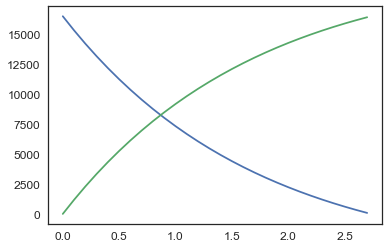

In [41]:
results.thermal_energy_plate.plot()
results.thermal_energy_ice.plot()